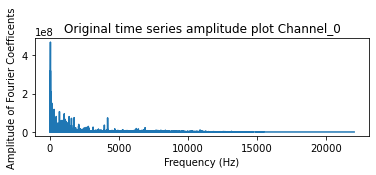

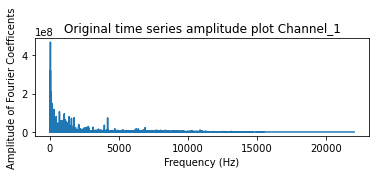

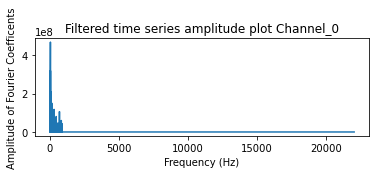

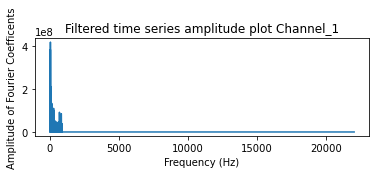

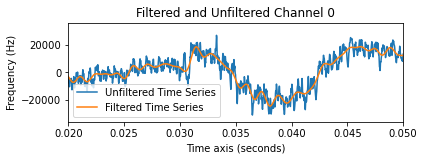

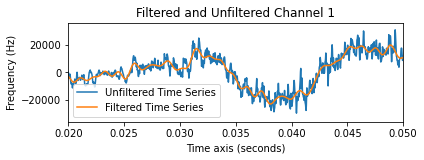

In [4]:
# Question 2 b)
# Author: Ilyas Sharif

""" The scipy.io.wavfile allows you to read and write .wav files """
from scipy.io.wavfile import read, write
from numpy import empty, pi
import numpy as np 
import matplotlib.pyplot as plt
from numpy.fft import rfft

# read the data into two stereo channels
# sample is the sampling rate, data is the data in each channel,
# dimensions [2, nsamples]
sample, data = read('GraviteaTime.wav')
# sample is the sampling frequency, 44100 Hz
# separate into channels
channel_0 = data[:, 0]
channel_1 = data[:, 1]
N = len(channel_0)

# Calculating the time scale, factoring in sample rate
dt = 1 / sample
time = np.linspace(0, N*dt, N)

# Computing the Fourier Transforms of each Channel
f_channel_0 = (np.fft.rfft(channel_0))
f_channel_1 = (np.fft.rfft(channel_1))

# Calculating the frequency axis
frequency = np.arange(N/2 + 1)/(N*dt)

plt.figure(1)
plt.subplot(212)
plt.plot(frequency, (np.abs(f_channel_0)))
plt.title("Original time series amplitude plot Channel_0")
plt.ylabel("Amplitude of Fourier Coefficents")
plt.xlabel("Frequency (Hz)")
plt.show()
plt.subplot(212)
plt.plot(frequency, (np.abs(f_channel_0)))
plt.title("Original time series amplitude plot Channel_1")
plt.ylabel("Amplitude of Fourier Coefficents")
plt.xlabel("Frequency (Hz)")
plt.show()

for i in range(len(f_channel_0)):
    if np.abs(frequency[i]) > 880:
        f_channel_0[i] = 0
        f_channel_1[i] = 0
        
plt.figure(2)
plt.subplot(212)
plt.plot(frequency, np.abs(f_channel_0))
plt.title("Filtered time series amplitude plot Channel_0")
plt.ylabel("Amplitude of Fourier Coefficents")
plt.xlabel("Frequency (Hz)")
plt.show()
plt.subplot(212)
plt.plot(frequency, np.abs(f_channel_1))
plt.title("Filtered time series amplitude plot Channel_1")
plt.ylabel("Amplitude of Fourier Coefficents")
plt.xlabel("Frequency (Hz)")
plt.show()
        
filter_channel_0 = np.fft.irfft(f_channel_0)
filter_channel_1 = np.fft.irfft(f_channel_1)

plt.figure(3)
plt.subplot(212)
plt.plot(time, channel_0 , label = 'Unfiltered Time Series')
plt.plot(time, filter_channel_0, label = 'Filtered Time Series')
plt.title("Filtered and Unfiltered Channel 0")
plt.xlim(0.02,0.05)
plt.xlabel("Time axis (seconds)")
plt.ylabel("Frequency (Hz)")
plt.legend()
plt.show()
plt.subplot(212)
plt.plot(time, channel_1, label = 'Unfiltered Time Series')
plt.plot(time, filter_channel_1, label = 'Filtered Time Series')
plt.xlim(0.02,0.05)
plt.title("Filtered and Unfiltered Channel 1")
plt.xlabel("Time axis (seconds)")
plt.ylabel("Frequency (Hz)")
plt.legend()